In [659]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [661]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv",index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [663]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [665]:
df_market_data.hvplot.line(
    y=['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
    width=800,
    height=400,
    rot=90,
    line_width=2,
    cmap='viridis',  # Choose a colormap like 'viridis', 'plasma', 'coolwarm', etc.
    #legend='top_left'  # Optional, to place the legend
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

# Prepare the Data

In [669]:
# NO NULL Values - NO IMPUTATION
# NO STRINGS - NO ENCODING
# DIFFERENT RANGES & DISTRIUBTIONS - NEED A SCALER

In [671]:
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [673]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
num_cols = ['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']

# Initalize and Fit the Scaler
ss = StandardScaler()
ss.fit(df_market_data.loc[:, num_cols])



StandardScaler()

In [675]:
# Transform the Data and Create a DataFrame with the scaled data 
df_scaled = pd.DataFrame(ss.transform(df_market_data.loc[:, num_cols]), columns=num_cols, index =df_market_data.index )

# Display the scaled DataFrame
df_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [677]:
df_scaled.hvplot.line(
    y=['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
    width=800,
    height=400,
    rot=90,
    line_width=2,
    cmap='viridis',  # Choose a colormap like 'viridis', 'plasma', 'coolwarm', etc.
    #legend='top_left'  # Optional, to place the legend
)


:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [681]:
# Do Unsupervised Clustering
# KMeans on SCALED DATA
# Define your "X" - features to predict
X = df_scaled

In [683]:
# Create a list with the number of k-values from 1 to 11
k = list(range(2, 12))

# Create an empty list to store the inertia values
inertia = []
s_scores = []
vrc_scores = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)
# 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(X)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)
    
    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)
    
# Create a dictionary with the data to plot the Elbow curve
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}

# Create a DataFrame with the data
df_metrics_scaled = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics_scaled.head(10)

,k,inertia,s_score,vrc_scores
0,2,212.123342,0.690885,13.766470
1,3,165.136752,0.260810,14.021117
2,4,79.022435,0.314482,32.459853
3,5,66.413051,0.323913,29.892958
4,6,61.634088,0.251616,25.595599
5,7,46.074467,0.258868,29.631263
6,8,43.392694,0.252185,26.466078
7,9,32.913223,0.260185,30.879599
8,10,30.469111,0.168099,29.000071
9,11,26.480101,0.175935,29.514981


In [687]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
# Plot the Elbow curve using hvplot
elbow_curve_scaled = df_metrics_scaled.hvplot.line(x='k', 
                       y='inertia', 
                       xlabel='Number of Clusters (k)', 
                       ylabel='Inertia', 
                       title='Elbow Curve for scaled data', 
                       width=600, 
                       height=400
                      )
elbow_curve_scaled

:Curve   [k]   (inertia)

In [689]:
# Agglomerative

# Create a list with the number of k-values from 1 to 11
k = list(range(2, 12))

# Create an empty list to store the inertia values
s_scores = []
vrc_scores = []

# LOOP 
for i in k:
    # Fit the Model
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics= pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.707392,18.399507
1,3,0.702822,25.264783
2,4,0.340837,28.413892
3,5,0.276114,30.023823
4,6,0.277295,29.858770
5,7,0.276363,30.467052
6,8,0.198534,31.166776
7,9,0.201693,30.667151
8,10,0.199804,31.005396
9,11,0.206917,31.424703


In [691]:
# BIRCH

# Create a list with the number of k-values from 1 to 11
k = list(range(2, 12))

# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

for i in k:
    # Fit the Model
    model = Birch(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.707392,18.399507
1,3,0.702822,25.264783
2,4,0.340837,28.413892
3,5,0.336476,27.695263
4,6,0.185448,29.126884
5,7,0.193982,29.159036
6,8,0.197678,28.717616
7,9,0.194521,27.594528
8,10,0.194966,27.529234
9,11,0.227577,33.233982


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The Elbow curve indicates that the inertia decreases significantly up to k=4, and from KMeans we can see that, the VRC is highest for k=4, so k=4 is indeed a very strong candidate for the optimal number of clusters. The Elbow Method, combined with the VRC and reasonable silhouette scores, supports choosing k=4 as the best value.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [696]:
# Fit the KMeans model using the best k=4 
model = KMeans(n_clusters=4, random_state=1)

# Fit the K-Means model using the scaled DataFrame
model.fit(X)

# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
preds = model.predict(X)

# Create a copy of the scaled DataFrame
df_sub = X.copy()

# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_sub['clusters'] = preds

# Display the copy of the scaled DataFrame
df_sub.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [698]:
print(df_sub.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'clusters'],
      dtype='object')


In [702]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot_1 = df_sub.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d',   
    c='clusters',                    # Color by the clusters
    hover_cols=['coin_name'],         # Show the cryptocurrency name in the hover tooltip
    cmap='viridis',                      # Color map to use for different clusters
    title='Cryptocurrency Clusters for scaled data',  # Plot title
    width=500,                        # Set the width of the plot
    height=400                        # Set the height of the plot
)

# Display the plot
scatter_plot_1

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters)

---

In [705]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled))  # Apply t-SNE to scaled data

# Rename the columns for clarity
df_tsne.columns = ['tsne_1', 'tsne_2']  # Rename columns to represent t-SNE dimensions

# Reset index to ensure proper alignment of clusters and preserve the coin_id (index)
df_sub_reset = df_sub.reset_index(drop=False)  # Keep the original index (coin_id) as 'coin_id' column

# Assign the 'clusters' and 'coin_name' properly
df_tsne['clusters'] = df_sub_reset['clusters']  # Add cluster labels
df_tsne['coin_name'] = df_sub_reset['coin_id']  # Use the 'coin_id' column for coin names

# Plotting with hvPlot
scatter_plot = df_tsne.hvplot.scatter(
    x='tsne_1',            # First t-SNE dimension
    y='tsne_2',            # Second t-SNE dimension
    c='clusters',          # Color by clusters
    hover_cols=['coin_name'],  # Show crypto names in the hover tooltip
    cmap='viridis',            # Choose a color map for different clusters
    title='t-SNE on Scaled Data',  # Title of the plot
    width=800,              # Width of the plot
    height=400              # Height of the plot
)

# Display the plot
scatter_plot

:Scatter   [tsne_1]   (tsne_2,clusters,coin_name)

# Optimize Clusters with Principal Component Analysis.

### Check for Multicollinearity

In [709]:
# Correlations
corrs = df_scaled.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


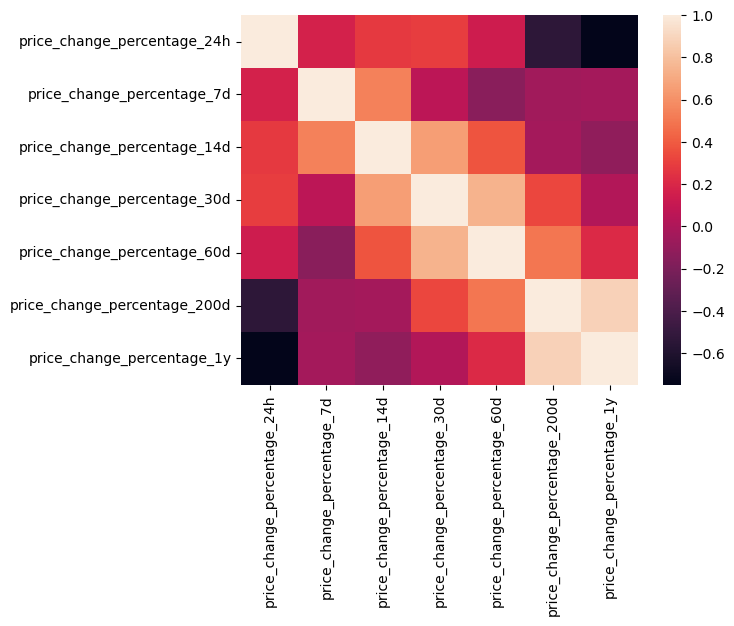

In [711]:
sns.heatmap(corrs)
plt.show()

In [713]:
# WE HAVE MULTICOLLINEARITY
# THIS MEANS THAT WE CAN REDUCE OUR FEATURE SET BY USING PRINCIPAL COMPONENTS ANALYSIS

In [715]:
# Initialize PCA
n_components = len(df_scaled.columns)
pca = PCA(n_components=n_components)

# Fit the PCA model on the preprocessed DataFrame
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])

df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,-0.600667,0.842760,0.461595,-0.109151,-0.033786,-0.225703,0.006595
1,-0.458261,0.458466,0.952877,0.095100,0.014588,0.034158,0.109593
2,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,-0.127710,-0.086857
3,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,-0.273472,0.134870
4,-1.157800,2.041209,1.859715,0.236479,-0.191787,-0.411513,-0.070411


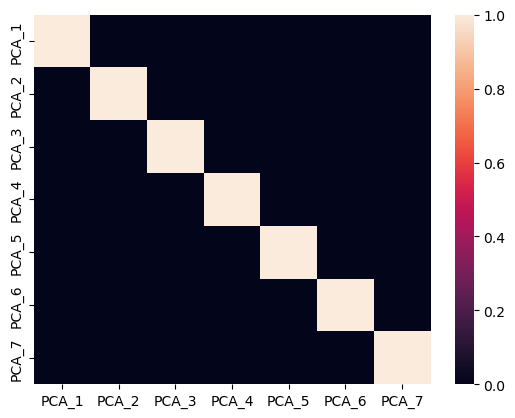

In [717]:
# sanity check
corrs = df_pca.corr()
sns.heatmap(corrs)
plt.show()

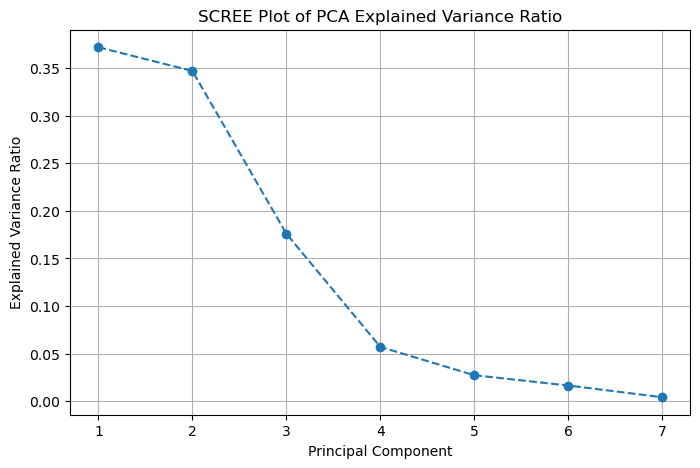

In [719]:
# See if dimensionality reduction will help

# Assume pca.explained_variance_ratio_ is already computed
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, n_components + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('SCREE Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

In [721]:
sum(pca.explained_variance_ratio_[0:5]) 


0.9793859343648178

In [723]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_pca))  # Apply t-SNE to scaled data

# Rename the columns for clarity
df_tsne.columns = ['tsne_1', 'tsne_2']  # Rename columns to represent t-SNE dimensions

# Reset index to ensure proper alignment of clusters and preserve the coin_id (index)
df_sub_reset = df_sub.reset_index(drop=False)  # Keep the original index (coin_id) as 'coin_id' column

# Assign the 'clusters' and 'coin_name' properly
df_tsne['clusters'] = df_sub_reset['clusters']  # Add cluster labels
df_tsne['coin_name'] = df_sub_reset['coin_id']  # Use the 'coin_id' column for coin names

# Plotting with hvPlot
scatter_plot = df_tsne.hvplot.scatter(
    x='tsne_1',            # First t-SNE dimension
    y='tsne_2',            # Second t-SNE dimension
    c='clusters',          # Color by clusters
    hover_cols=['coin_name'],  # Show crypto names in the hover tooltip
    cmap='viridis',            # Choose a color map for different clusters
    title='t-SNE on PCA Data',  # Title of the plot
    width=800,              # Width of the plot
    height=400              # Height of the plot
)

# Display the plot
scatter_plot

:Scatter   [tsne_1]   (tsne_2,clusters,coin_name)

In [725]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca = PCA(n_components=3)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PCA1', 'PCA2', 'PCA3'])

# View the first few rows of the reduced PCA data
df_pca.head(10)

,PCA1,PCA2,PCA3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715
5,-0.516534,1.388377,0.804071
6,-0.450711,0.517699,2.846143
7,-0.345600,0.729439,1.478013
8,-0.649468,0.432165,0.600303
9,-0.759014,-0.201200,-0.217653


In [727]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

print("Explained Variance Ratio of each component:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio of each component:
[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?
**Answer:** Total Explained Variance=0.525+0.312+0.163=1.000. The Total Variance ratio of 1.000 means that these three principal components together explain 100% of the variance in the data. This indicates that all the original variability in the dataset is captured by these three components.


In [730]:
# 1. Create a new DataFrame with the PCA data
X = df_pca.copy()

# 2. Copy the crypto names (coin_id) from the original scaled DataFrame
X['coin_id'] = df_scaled.index

# 3. Set the coin_id column as the index of the new DataFrame
X.set_index('coin_id', inplace=True)

# 4. Display the scaled PCA DataFrame with the crypto names (coin_id) as the index
X.head(10)


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [734]:
# Create a list with the number of k-values from 1 to 11
k = list(range(2, 12))

In [736]:
# Create an empty list to store the inertia values
inertia = []
s_scores = []
vrc_scores = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    # Fit the Model
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)


In [737]:
# Create a dictionary with the data to plot the Elbow curve
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics_PCA = pd.DataFrame(metrics)

# Create a DataFrame with the data to plot the Elbow curve
df_metrics_PCA.head(10)

,k,inertia,s_score,vrc_scores
0,2,182.339530,0.728406,15.941950
1,3,135.442408,0.356130,17.034560
2,4,49.665497,0.420800,51.455694
3,5,38.672582,0.405662,50.780512
4,6,34.507577,0.334511,45.107936
5,7,23.728365,0.375378,55.678472
6,8,18.574523,0.316385,60.481348
7,9,15.572672,0.323751,61.980734
8,10,11.407667,0.350621,74.116423
9,11,8.058822,0.361557,92.624679


In [740]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_curve_PCA = df_metrics_PCA.hvplot.line(x='k', 
                       y='inertia', 
                       xlabel='Number of Clusters (k)', 
                       ylabel='Inertia', 
                       title='Elbow Curve for PCA data', 
                       width=600, 
                       height=400
                      )
elbow_curve_PCA

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The biggest drop in inertia occurs between k=2 to k=4, meaning adding more clusters significantly improves fit. A good trade-off is likely around k=4 or k=5, where inertia stabilizes and VRC is still relatively high. Therefore in my point of view, k=4 is best value.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** k=4 is the best trade-off for both the original and PCA-transformed data. PCA did not significantly change the optimal k. While PCA sometimes shifts the ideal k, in this case, the impact is minimal.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [744]:
# Fit the KMeans model using the best k=4 
model = KMeans(n_clusters=4, random_state=1)

# Fit the K-Means model using the scaled DataFrame
model.fit(X)

# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
preds = model.predict(X)

# Create a copy of the scaled DataFrame
df_sub = X.copy()

# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_sub['clusters'] = preds

# Display the copy of the scaled DataFrame
df_sub

,PCA1,PCA2,PCA3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


In [746]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot_2 = df_sub.hvplot.scatter(
    x='PCA1', 
    y='PCA2',   
    c='clusters',                    # Color by the clusters
    hover_cols=['coin_id'],         # Show the cryptocurrency name in the hover tooltip
    cmap='viridis',                      # Color map to use for different clusters
    title='Cryptocurrency Clusters for PCA Data',  # Plot title
    width=600,                        # Set the width of the plot
    height=400                        # Set the height of the plot
)

# Display the plot
scatter_plot_2

:Scatter   [PCA1]   (PCA2,clusters,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [749]:
# Combine the two elbow curves into a composite plot
composite_plot = elbow_curve_scaled + elbow_curve_PCA

# Display the composite plot
composite_plot


:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [751]:
# Composite plot to contrast the clusters
composite_plot = scatter_plot_1 + scatter_plot_2

# Display the composite plot
composite_plot


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters)
   .Scatter.II :Scatter   [PCA1]   (PCA2,clusters,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** With only 41 rows in the dataset, the clustering results didn't change much after reducing the number of features because the dataset is small, and the patterns were already clear.